# Aluno : André da Cunha Melo Tolentino

### Resumo : 
<p>Nesse projeto foi disponibilizado a base de dados do MovieLens para que o aluno pudesse realizar a manutenção e exploração dos dados a fim de praticar o conteúdo apresentado nas aulas da formação DataScience.<p/>
<p>Primeiramente realizou-se uma análise macro (histogramas e distribuição cumulativa), para entender o comportamento do número de votos e a média dos filmes. Foi possível observar que grande parte dos filmes (aproximadamente 80%) possui número de votos inferior a 130. Ou seja, um número bem inferior se comparado ao número de pessoas que de fato assistiram ao filme.<p/>
<p>Ao analisar essas variáveis por gênero, percebeu-se que embora o gênero de ação tenha mais visualizações, ele não é o com maior popularidade. Isso porque, ele também é um gênero com muitos filmes produzidos, e ao se dividir o número de visualizações pelo número de filmes, obteve-se uma popularidade inferior ao gênero dos filmes de Guerra.<p/>
<p>Foi pedido para comparar os gêneros Aventura e Horror a partir de gráficos de boxplot e histograma, para que pudéssemos realizar a tomada de decisão sobre qual filme seria mais rentável, tendo o ponto de vista de popularidade (número de visualizações) ou de boa crítica (notas médias). Aparentemente os filmes de Aventura são mais vistos, enquanto os de Horror estão com maiores notas.<p/>
<p>Também foi pedido para verificar quais são os top 5 filmes com maiores médias em relação aos 2 gêneros mais visualizados. A lista mostras que a trilogia Poderoso Chefão é bem aclamada pela crítica, já que 2 Filmes da Franquia figuram entre os Top 5.<p/>
<p>Em relação a como os gêneros estão correlacionados, pode-se perceber que filmes dos gêneros Animação e Infantil são os com maiores coeficientes Pearson, tanto no quesito de N° de Visualizações quanto em relação as Notas Médias, o que é de se esperar, visto que a maioria dos filmes de Animação são voltados ao público Infantil.<p/>
<p>No último ponto da avaliação, é necessário que o aluno compare como é a correlação entre os atributos nota média, ano de lançamento e total de votos. Embora nesse ponto algumas tendências foram observadas, há uma grande dispersão dos nossos dados (desvio padrão elevado), e com isso, qualquer tentativa de regressão linear possui R2 reduzido. <p/>
<p>Mesmo quando observamos o gênero Horror (maior correlação entre nota média e total de votos), grande parte dos pontos ficam distantes da reta calculada pelo método dos mínimos quadrados.<p/>
<p>Por fim, é analisado pelo aluno o comportamento de três trilogias (Piratas do Caribe, Toy Story e senhor dos Anéis), afim de perceber a existência de um padrão comportamental entre os filmes e tentar responder a pergunta de produtoras: será melhor dar continuidade aos filmes já existentes ou começar uma nova história?<p/>





## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

import numpy as np

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.25.1
Usando seaborn 0.9.0
Usando scipy 1.3.1


In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# Defindo palheta de cores
sns.set_style("darkgrid")
sns.set_palette("Accent")

## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [5]:
# solução
# Carregando os dados
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
# Renomeando Colunas
filmes.columns = ['filmeId', 'titulo', 'generos']
# Configurando Index
filmes.index = filmes['filmeId']
filmes.drop("filmeId", axis=1, inplace = True)

In [6]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [7]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [8]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [9]:
# solução
# Carregando dados
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
# Renomeando colunas
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [11]:
# solução
# Agrupando notas e tirando a média por filmes
notas_agrupamento_media = notas.groupby('filmeId')['nota'].mean().round(2)
# Criando a coluna 'nota_media' no dataframe 'filmes'
filmes['nota_media'] = notas_agrupamento_media

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.36
5,Father of the Bride Part II (1995),Comedy,1995.0,3.07


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [13]:
# solução
# Calculando o total de votos por filme
numero_de_votos = notas['filmeId'].value_counts()
numero_de_votos

356       329
318       317
296       307
593       279
2571      278
         ... 
5986        1
100304      1
34800       1
83976       1
8196        1
Name: filmeId, Length: 9724, dtype: int64

In [14]:
# Criando nova coluna
filmes['total_de_votos'] = numero_de_votos
# Filtrando filmes com menos de 50 avaliações
filmes.query('total_de_votos>=50', inplace=True)

In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.92,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.43,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.26,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.95,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.19,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0.5, 0, 'Notas Médias')

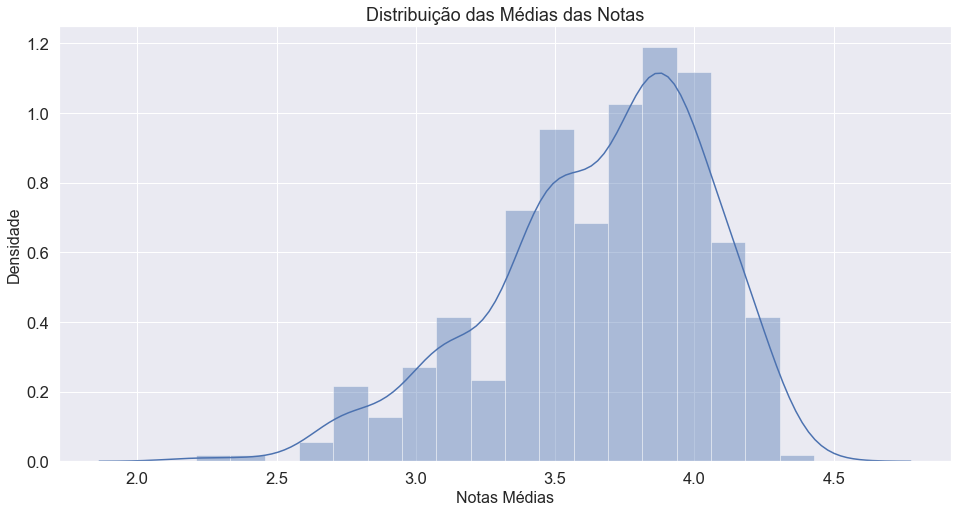

In [16]:
# solução histograma
sns.set(font_scale= 1.5)
ax = sns.distplot(filmes['nota_media'])

ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição das Médias das Notas', fontsize = 18)
ax.set_ylabel('Densidade',  fontsize = 16)
ax.set_xlabel('Notas Médias', fontsize = 16)

Text(0.5, 0, 'Notas Médias')

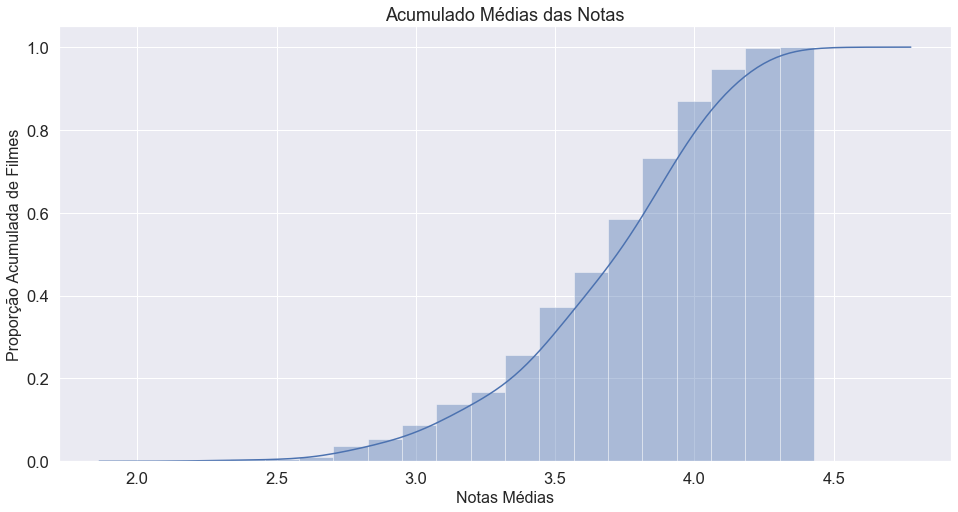

In [17]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'], hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})

ax.figure.set_size_inches(16, 8)
ax.set_title('Acumulado Médias das Notas', fontsize = 18)
ax.set_ylabel('Proporção Acumulada de Filmes', fontsize = 16)
ax.set_xlabel('Notas Médias', fontsize = 16)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0.5, 0, 'Total de Votos por Filme')

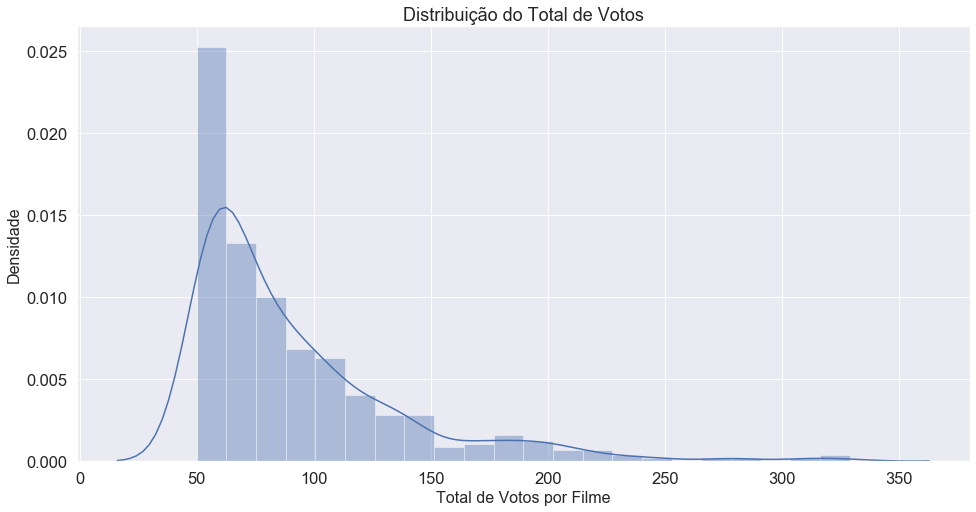

In [18]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'])

ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição do Total de Votos', fontsize = 18)
ax.set_ylabel('Densidade', fontsize = 16)
ax.set_xlabel('Total de Votos por Filme', fontsize = 16)

Text(0.5, 0, 'Total de Votos por Filme')

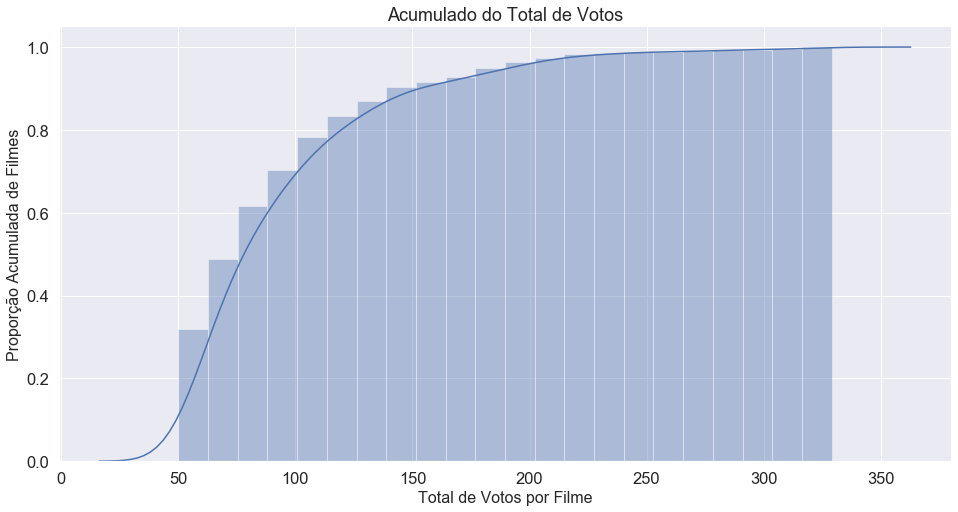

In [19]:
# solução cumulativa
ax = sns.distplot(filmes['total_de_votos'], hist_kws = {'cumulative':True}, kde_kws = {'cumulative':True})

ax.figure.set_size_inches(16, 8)
ax.set_title('Acumulado do Total de Votos', fontsize = 18)
ax.set_ylabel('Proporção Acumulada de Filmes', fontsize = 16)
ax.set_xlabel('Total de Votos por Filme', fontsize = 16)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [20]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.2)

In [21]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.38


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [22]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [23]:
generos.sum()

Action         164
Adventure      132
Animation       32
Children        47
Comedy         181
Crime           87
Documentary      2
Drama          166
Fantasy         66
FilmNoir         4
Horror          26
IMAX            28
Musical         21
Mystery         38
Romance         85
SciFi           92
Thriller       121
War             19
Western         12
dtype: int64

In [24]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.92,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.43,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.26,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.95,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.19,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0, 0.5, 'Número de Filmes')

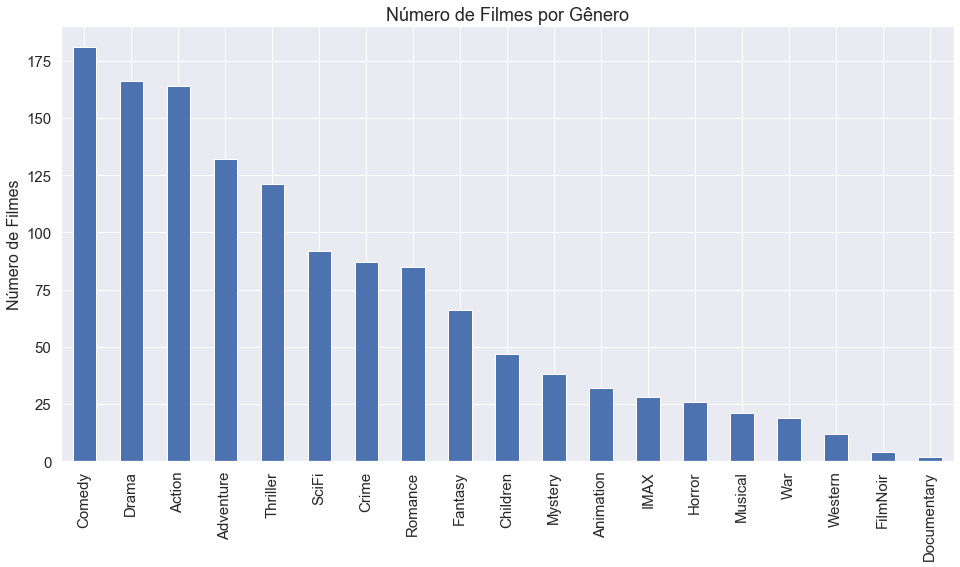

In [25]:
# solução
# Calculando quantos filmes existem por genero
filmes_generos = generos.sum()
# Ordenando os dados de forma decrescente
filmes_generos.sort_values(inplace = True, ascending=False)
# Criando gráfico de barras
ax = filmes_generos.plot.bar(x=filmes_generos.index, y=filmes_generos, fontsize=15)

ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Filmes por Gênero', fontsize = 18)
ax.set_ylabel('Número de Filmes', fontsize = 16)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [26]:
# solução
# Selecionando os 5 primeiros gêneros da Série
top5_generos_em_quantidade_de_filmes=filmes_generos.index[:5,]
# Transformando em um array numpy
top5_generos_em_quantidade_de_filmes = np.array(top5_generos_em_quantidade_de_filmes)

In [27]:
print(f' Segue a lista dos 5 gêneros com maior quantidade de filmes {top5_generos_em_quantidade_de_filmes}')

 Segue a lista dos 5 gêneros com maior quantidade de filmes ['Comedy' 'Drama' 'Action' 'Adventure' 'Thriller']


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [28]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [29]:
# solucão 
# Calculando o total de votos por filme
votos_por_genero_por_filme.loc['Total',:]= votos_por_genero_por_filme.sum(axis=0)
# Ordenando os generos pelo total de votos
votos_por_genero_por_filme.sort_values(by = 'Total', axis = 1, ascending=False, inplace = True)
# Removendo a linha Total
votos_por_genero_por_filme.drop(['Total'], inplace = True)
# Visualização da tabela ordenada
votos_por_genero_por_filme

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
0,0.0,0.0,215.0,215.0,0.0,0.0,0.0,0.0,215.0,215.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,102.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,54.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0
447,59.0,0.0,0.0,59.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
448,0.0,50.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Número de Visualizações')

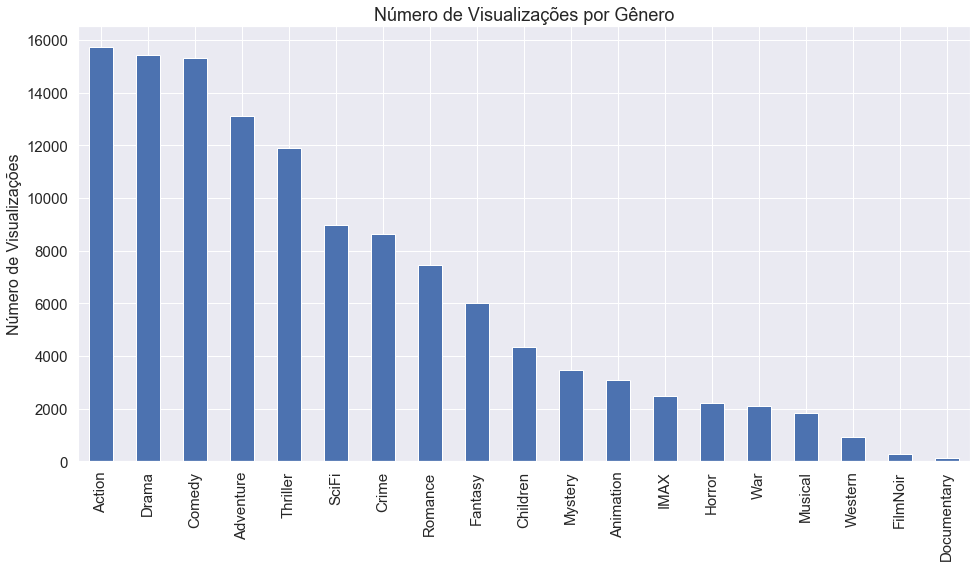

In [30]:
# solução visualização
# Criando Serie com número total de votos por Gênero
serie_generos_visualizacao = votos_por_genero_por_filme.sum().sort_values(ascending=False)
# Gerando gráfico
ax = serie_generos_visualizacao.plot.bar(x=serie_generos_visualizacao.index, y=serie_generos_visualizacao, fontsize=15)

ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Visualizações por Gênero', fontsize = 18)
ax.set_ylabel('Número de Visualizações', fontsize = 16)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [31]:
# solucao
# Criando DataFrame com Genero e Número de Votos
df = pd.DataFrame(serie_generos_visualizacao,columns = ['Votos'])
# Criando nome para a coluna do Index
df.columns.name = 'Gênero'
# Adcionando a coluna número de filmes por caregoria
df['N° Filmes'] = generos.sum()
# Calculnado Popularidade
df['Popularidade'] = (df['Votos']/df['N° Filmes']).round(1)
# Ordenando Gêneros pela maior Popularidade
df.sort_values(by = 'Popularidade', inplace = True, ascending=False)
df

Gênero,Votos,N° Filmes,Popularidade
War,2113.0,19,111.2
Adventure,13117.0,132,99.4
Crime,8649.0,87,99.4
Thriller,11907.0,121,98.4
SciFi,8989.0,92,97.7
Action,15734.0,164,95.9
Animation,3066.0,32,95.8
Drama,15445.0,166,93.0
Children,4331.0,47,92.1
Fantasy,5993.0,66,90.8


Text(0.5, 1.0, 'Popularidade de Filmes por Gênero')

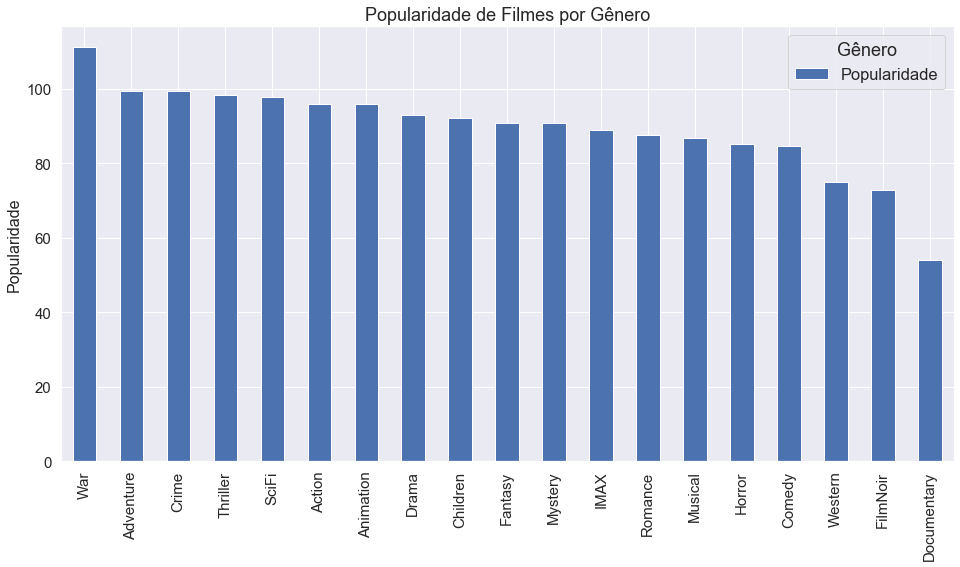

In [32]:
# solução com visualização 
ax = df.plot.bar(y = ['Popularidade'], figsize = (16, 8), fontsize=15)

ax.set_ylabel('Popularidade', fontsize = 16)
ax.set_title('Popularidade de Filmes por Gênero', fontsize = 18)
# Será que não seria mais interessante colocar o gráfico de bolhas?

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):

   <p> A princípio, quando analisamos puramente o número de avaliações, temos a impressão que os filmes de ação são os mais populares devido a grande quantidade de visualizações. Ou seja, em teoria seria mais interessante para um estúdio de cinema lançar filmes do gênero Ação.</p>
   <p> No entanto, ao se parametrizar pela quantidade de filmes que cada gênero possui, percebe-se que em média os filmes de Guerra levam mais pessoas para as sala de cinema. Logo, é de extrema importância para qualquer analise que os dados não sejam analisados de forma absoluta, mas sempre relativos a algum outro atributo (variável). </p>
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

In [33]:
# Selecionando apenas filmes com  votos acima de 0 para o Gênero Adventure
Adventure_Votos = votos_por_genero_por_filme.query('Adventure>0').Adventure
# Selecionando apenas filmes com  votos acima de 0 para o Gênero Horror
Horror_Votos = votos_por_genero_por_filme.query('Horror>0').Horror

Text(0, 0.5, 'Número de Votos')

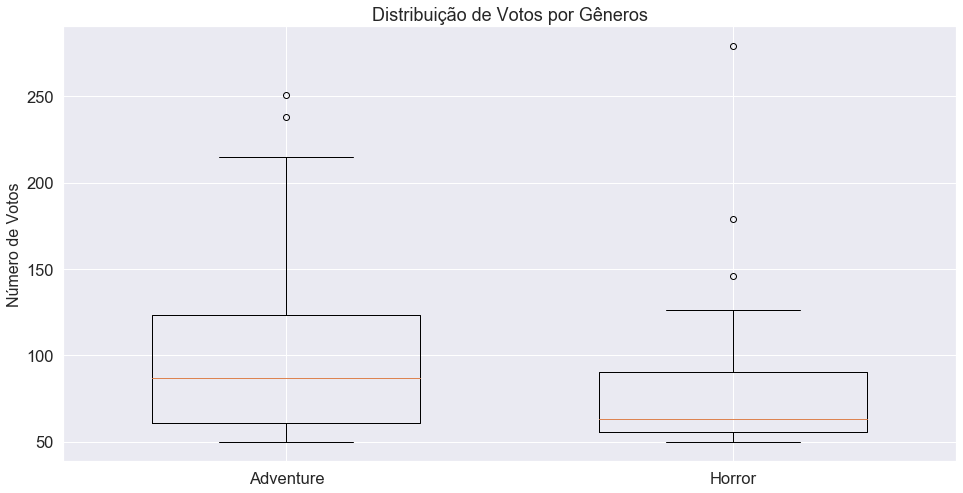

In [34]:
# solução:

plt.figure(figsize=(16,8))
ax = plt.boxplot((Adventure_Votos, Horror_Votos), labels = ['Adventure', 'Horror'], widths = 0.6)

plt.title("Distribuição de Votos por Gêneros", fontsize=18)
plt.ylabel("Número de Votos", fontsize = 16)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

In [35]:
votos_por_genero_por_filme_Null = votos_por_genero_por_filme
votos_por_genero_por_filme_Null.replace(0, np.NaN)

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
0,NaN,NaN,215.0,215.0,NaN,NaN,NaN,NaN,215.0,215.0,NaN,215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,110.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,52.0,NaN,NaN,NaN,NaN,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,102.0,NaN,NaN,NaN,102.0,NaN,102.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,54.0,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,NaN,52.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
446,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN
447,59.0,NaN,NaN,59.0,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
448,NaN,50.0,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Número de Votos')

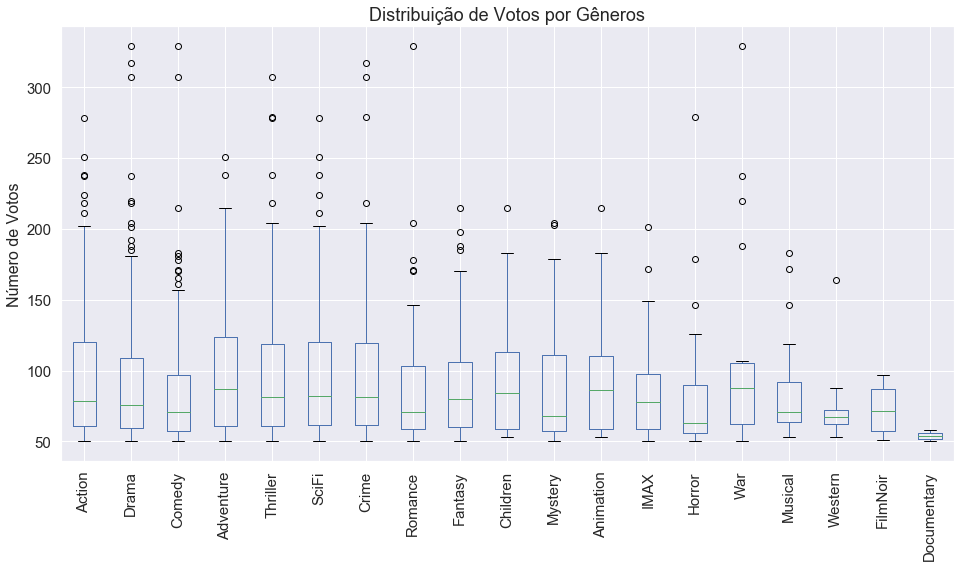

In [36]:
plt.figure(figsize=(16,8))
votos_por_genero_por_filme_Null.replace(0, np.NaN).boxplot(rot=90, fontsize=15, grid = True)
plt.title("Distribuição de Votos por Gêneros", fontsize=18)
plt.ylabel("Número de Votos", fontsize = 16)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:


   <p> O gráfico boxplot permite localizar a mediana, 1° e 3° quartis, além de permitir idenficar outliers. Como o objetivo da pergunta é escolher qual dos gêneros possui maior chance de retornar um faturamento que pague as contas do filme, acredito que a melhor opção seja o gênero Adventure, visto que esse possui maior mediana, 1° e 3° quartis. Ou seja, é mais provável que um número maior de pessoas assitam um filme de Aventura que Horror. Aqui cabe ressaltar que o filme com maior número de visulizações entre esse dois gêneros foi de Horror. </p>

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Número de Votos')

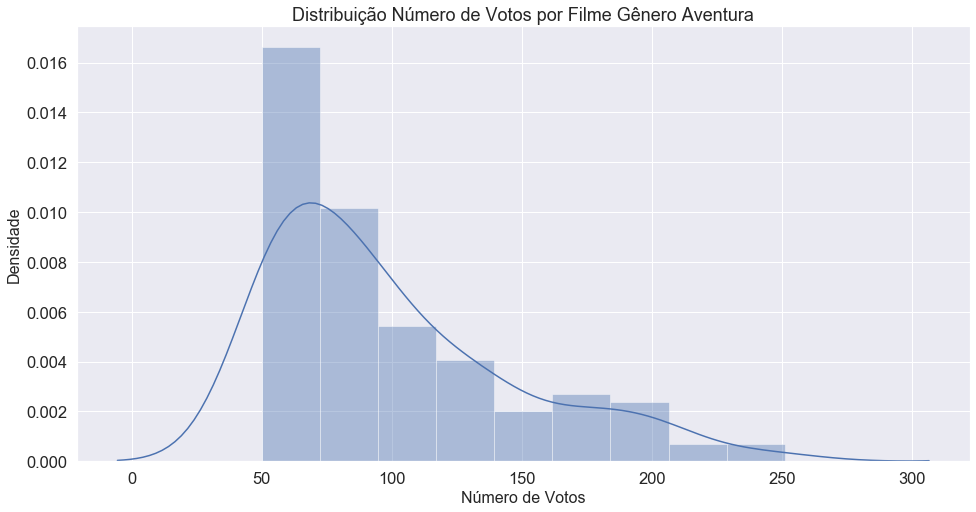

In [37]:
# solucao histograma gênero Aventura

ax = sns.distplot(votos_por_genero_por_filme.query('Adventure>0').Adventure)

ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição Número de Votos por Filme Gênero Aventura', fontsize = 18)
ax.set_ylabel('Densidade', fontsize = 16)
ax.set_xlabel('Número de Votos', fontsize = 16)

Text(0.5, 0, 'Número de Votos')

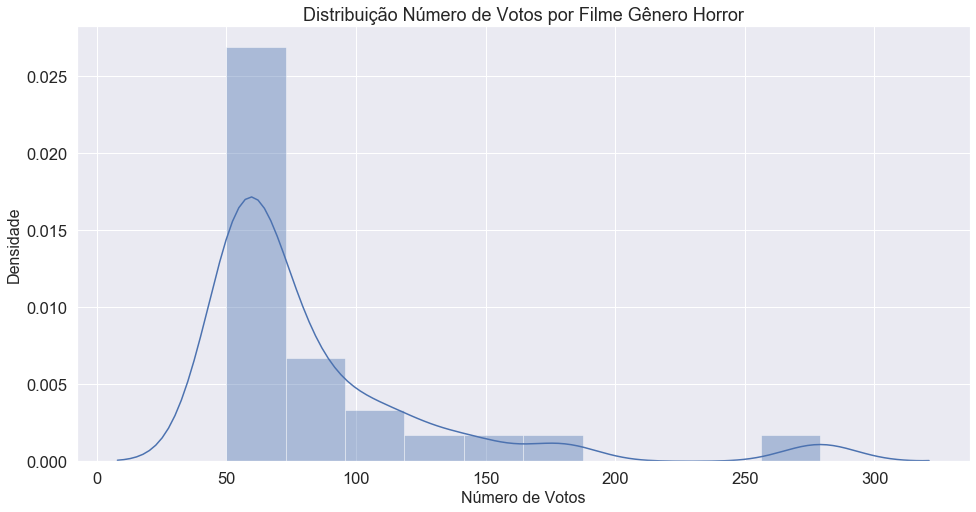

In [38]:
# solucao histograma Gênero Horror

ax = sns.distplot(votos_por_genero_por_filme.query('Horror>0').Horror)

ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição Número de Votos por Filme Gênero Horror', fontsize = 18)
ax.set_ylabel('Densidade', fontsize = 16)
ax.set_xlabel('Número de Votos', fontsize = 16)

In [39]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p = normaltest(votos_por_genero_por_filme.query('Adventure>0').Adventure)
p


5.987863006199139e-06

   <p> O p-value obtido pela teste da normalidade foi infeiror a 0.05. Ou seja, podemos descartar a hipotese nula, que no caso indica que a amostra vem de uma distribuição normal. Logo, não podemos aplicar o z-test nem o t-test. </p>

In [40]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(votos_por_genero_por_filme.query('Adventure>0').Adventure, votos_por_genero_por_filme.query('Horror>0').Horror)
p

0.04782366231999856

   <p> O p-value obtido pela teste de ranksums foi inferior a 0.05. Ou seja, podemos descartar a hipotese nula, que no caso é de que as duas amostras vieram da mesma distriuição. A hipótese alternativa é de que uma amostra (Adventure) possui a tendência de possuir valores maiores do que a outra amostra comparada (Horror).<p/>

### Solução (explique sua conclusão):


   <p> Como as amostras não seguem um comportamento da curva normal, temos que utilizar uma comparação não paramétrica. Nesse caso, utilizamos a função ranksums e obtivemos p-value inferior a 0.05. Como a solução alternativa do teste de ranksums indica a tendência que uma amostra possui maiores valores do que outra, continuamos com a recomendação de filmes do Gênero Adventure. <p/>

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

In [42]:
# Criando base de média votos 
media_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['nota_media'].values).T, columns = generos.columns)
media_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.00,3.92,3.92,3.92,3.92,0.00,0.0,0.0,3.92,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,0.00,3.43,0.00,3.43,0.00,0.00,0.0,0.0,3.43,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,0.00,0.00,0.00,0.00,3.26,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.26,0.0,0.00,0.0,0.0
3,3.95,0.00,0.00,0.00,0.00,3.95,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3.95,0.0,0.0
4,0.00,0.00,0.00,0.00,3.19,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,3.19,0.0,0.00,0.0,0.0


In [43]:
# Selecionando apenas filmes com  média acima de 0 para o Gênero Adventure
Adventure_Media = media_por_genero_por_filme.query('Adventure>0').Adventure
# Selecionando apenas filmes com  média acima acima de 0 para o Gênero Horror
Horror_Media = media_por_genero_por_filme.query('Horror>0').Horror

Text(0.5, 1.0, 'Distribuição de Médias de Filmes por Gêneros')

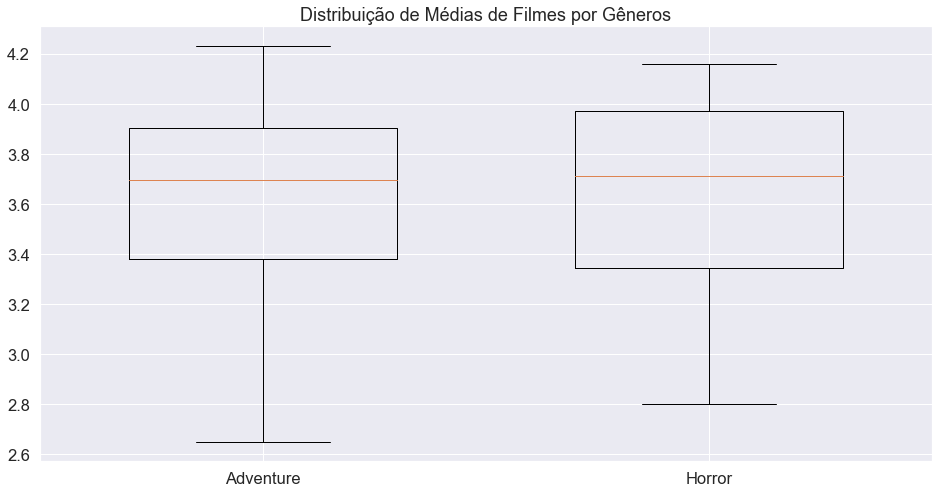

In [44]:
# solução:

plt.figure(figsize=(16,8))
ax = plt.boxplot((Adventure_Media, Horror_Media), labels = ['Adventure', 'Horror'], widths = 0.6)
plt.title("Distribuição de Médias de Filmes por Gêneros", fontsize=18)

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:



   <p> As medianas dos dois gêneros estão bem próximas. Visualmente é difícil distinguir qual é a mais alta. No entando, ao perceber os valores que estão abaixo do 1° quartil, percebe-se que a amplitude do gênero Adventure é maior do que o de Horror. Logo, aparentemente existe uma quantidade de filmes com médias mais baixas no gênero Aventura. Dessa forma, seria mais recomendado fazer a opção pelo filme com o Gênero Horror. <p/>

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0.5, 0, 'Média de Notas')

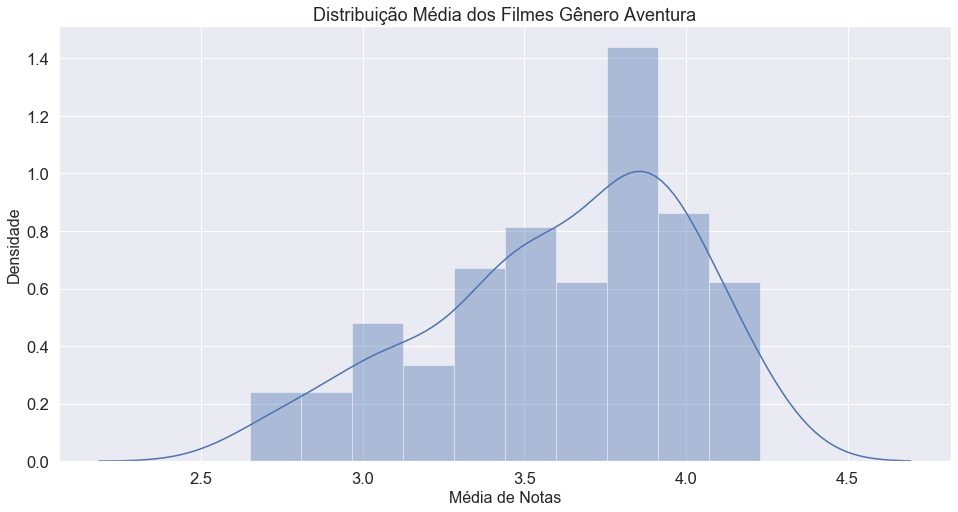

In [45]:
# solucao histograma de aventura
ax = sns.distplot(media_por_genero_por_filme.query('Adventure>0').Adventure, bins= 10)
ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição Média dos Filmes Gênero Aventura', fontsize = 18)
ax.set_ylabel('Densidade', fontsize = 16)
ax.set_xlabel('Média de Notas', fontsize = 16)

Text(0.5, 0, 'Média de Notas')

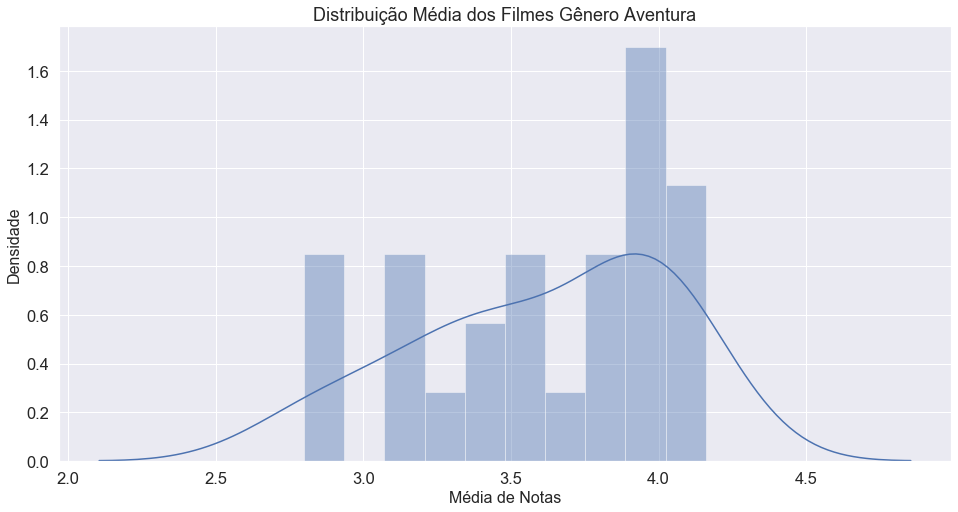

In [46]:
# solucao histograma de horror
ax = sns.distplot(media_por_genero_por_filme.query('Horror>0').Horror, bins=10)
ax.figure.set_size_inches(16, 8)
ax.set_title('Distribuição Média dos Filmes Gênero Aventura', fontsize = 18)
ax.set_ylabel('Densidade', fontsize = 16)
ax.set_xlabel('Média de Notas', fontsize = 16)

In [47]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p = normaltest(media_por_genero_por_filme.query('Adventure>0').Adventure)
p


0.012923175909772433

In [48]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(media_por_genero_por_filme.query('Horror>0').Horror, media_por_genero_por_filme.query('Adventure>0').Adventure)
p

0.8401944736957048

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
Como o teste de ranksums foi superior a 0,05 , não podemos podemos rejeitar a hipótese nula. Nesse caso Ho é a hipotese que a média das médias dos filmes do Gênero Horror é igual a média das médias dos filmes do Gênero de Aventura. Ou seja, nossa remonedação pelo gênro de Horror foi anulada.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
Acredito que a melhor Opção seja o Gênero de filme de Aventura, visto que, a média dos filmes em relação as notas parece ser a mesta, e no quesito de popularidade, ele foi apontado como o gênero que mais pessoas assistem.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?


- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [49]:
# Selecionando quais são os dois Generos mais votados
votos_por_genero = df['Votos']
generos_top_2 = np.array(votos_por_genero.sort_values(ascending=False)[0:2].index.values)
generos_top_2

array(['Action', 'Drama'], dtype=object)

In [50]:
# Selecionando apenas Filmes de Ação e Drama
selecao = (filmes[generos_top_2[0]] == 1) | (filmes[generos_top_2[1]] == 1)
filmes_genero_acao_drama = filmes[selecao]
# Selecionando os top 5 de média
filmes_top_5 = filmes_genero_acao_drama.sort_values(by = 'nota_media',ascending=False).titulo[0:5]
print(filmes_top_5.values)

['Shawshank Redemption, The (1994)' 'Godfather, The (1972)'
 'Cool Hand Luke (1967)' 'Fight Club (1999)'
 'Godfather: Part II, The (1974)']


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [51]:
# Aplicando a função corr para nota Média
df_corr_media = media_por_genero_por_filme.corr()
df_corr_media

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
Action,1.000000,0.331522,-0.171398,-0.209709,-0.312783,0.051079,-0.050050,-0.230968,-0.116692,-0.020280,0.002555,0.138068,-0.141460,-0.055262,-0.206137,0.315721,0.284097,0.080041,0.055699
Adventure,0.331522,1.000000,0.188707,0.184224,-0.093654,-0.237612,-0.042667,-0.275640,0.259277,-0.060472,-0.091281,0.226688,-0.040780,-0.091255,-0.163982,0.269168,-0.027471,-0.083611,0.041235
Animation,-0.171398,0.188707,1.000000,0.765441,0.137960,-0.089794,-0.018411,-0.122534,0.236528,-0.026095,-0.067818,0.117225,0.419516,-0.055833,0.017280,-0.100400,-0.165964,-0.057653,-0.045082
Children,-0.209709,0.184224,0.765441,1.000000,0.125106,-0.127136,-0.022683,-0.122695,0.365939,-0.032148,-0.083552,0.094254,0.416537,-0.079051,-0.011512,-0.107829,-0.204466,-0.071028,-0.055541
Comedy,-0.312783,-0.093654,0.137960,0.125106,1.000000,-0.113663,0.010061,-0.272613,0.087357,-0.076820,-0.039519,-0.155995,0.059914,-0.199499,0.220765,-0.235349,-0.362406,-0.071508,-0.020430
Crime,0.051079,-0.237612,-0.089794,-0.127136,-0.113663,1.000000,-0.032505,0.124395,-0.159987,0.203885,-0.036676,-0.019640,-0.107455,0.128999,-0.205232,-0.179308,0.274842,-0.075379,-0.079591
Documentary,-0.050050,-0.042667,-0.018411,-0.022683,0.010061,-0.032505,1.000000,0.010416,-0.027516,-0.006319,-0.016422,-0.017142,-0.014738,-0.020210,-0.032058,-0.033525,-0.040187,-0.013960,-0.010916
Drama,-0.230968,-0.275640,-0.122534,-0.122695,-0.272613,0.124395,0.010416,1.000000,-0.121720,-0.024607,-0.118774,-0.069522,-0.087568,0.015976,0.077837,-0.151160,-0.032089,0.224645,-0.006148
Fantasy,-0.116692,0.259277,0.236528,0.365939,0.087357,-0.159987,-0.027516,-0.121720,1.000000,-0.038999,-0.024237,0.165873,0.156313,-0.036000,0.029581,-0.159752,-0.181185,-0.056632,-0.067376
FilmNoir,-0.020280,-0.060472,-0.026095,-0.032148,-0.076820,0.203885,-0.006319,-0.024607,-0.038999,1.000000,-0.023275,-0.024296,-0.020888,0.325764,-0.045436,-0.047515,0.174945,-0.019786,-0.015472


In [52]:
# solucao Maior correlacao
# Criando Variável de comparação
maior_correlacao = 0
# Criando Variável de localizacao
localizacao = [ 0, 0]
# Executando comparação entre cada valor do dataframe
for i in range(len(generos.columns)):
    for j in range(len(generos.columns)):
        if df_corr_media.iloc[i,j] > 0:
            if df_corr_media.iloc[i,j] > maior_correlacao and df_corr_media.iloc[i,j] != 1:
                maior_correlacao = df_corr_media.iloc[i,j]
                localizacao = [i,j]
        else:
            if df_corr_media.iloc[i,j]*(-1) > maior_correlacao:
                maior_correlacao = df_corr_media.iloc[i,j]*-1
                localizacao = [i,j]
          
print(f' Os gêneros {df_corr_media.index[localizacao[0]]} e {df_corr_media.index[localizacao[1]]} são os com maior correlação')

 Os gêneros Animation e Children são os com maior correlação


In [53]:
# solucao Menor correlacao
# Criando Variável de comparação
menor_correlacao = 1
# Criando Variável de localizacao
localizacao = [ 0, 0]
# Executando comparação entre cada valor do dataframe
for i in range(len(generos.columns)):
    for j in range(len(generos.columns)):
        if df_corr_media.iloc[i,j] > 0:
            if df_corr_media.iloc[i,j] < menor_correlacao and df_corr_media.iloc[i,j] != 1:
                menor_correlacao = df_corr_media.iloc[i,j]
                localizacao = [i,j]
        else:
            if df_corr_media.iloc[i,j]*(-1) < menor_correlacao:
                menor_correlacao = df_corr_media.iloc[i,j]*-1
                localizacao = [i,j]
          
print(f' Os gêneros {df_corr_media.index[localizacao[0]]} e {df_corr_media.index[localizacao[1]]} são os com menor correlação')

 Os gêneros Action e Horror são os com menor correlação


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [54]:
# Aplicando a função corr para Total Votos
df_corr_votos = votos_por_genero_por_filme.corr()
df_corr_votos

,Action,Drama,Comedy,Adventure,Thriller,SciFi,Crime,Romance,Fantasy,Children,Mystery,Animation,IMAX,Horror,War,Musical,Western,FilmNoir,Documentary
Action,1.000000,-0.100417,-0.191843,0.390835,0.356187,0.447226,0.098703,-0.117684,-0.062992,-0.171368,-0.034214,-0.133342,0.087745,-0.046932,0.091303,-0.115978,-0.018969,-0.018063,-0.042802
Drama,-0.100417,1.000000,-0.059060,-0.163750,0.021491,-0.116796,0.264027,0.158475,-0.102463,-0.072436,-0.011126,-0.073877,0.057305,-0.044099,0.376114,-0.039854,0.031390,-0.042990,-0.013745
Comedy,-0.191843,-0.059060,1.000000,0.049993,-0.166691,-0.143788,-0.007877,0.288440,0.192885,0.205304,-0.158442,0.224447,-0.144792,-0.076909,0.095561,0.073264,-0.027262,-0.063882,-0.014871
Adventure,0.390835,-0.163750,0.049993,1.000000,0.009276,0.314849,-0.187399,-0.093532,0.300640,0.263066,-0.078963,0.288491,0.155957,-0.071019,-0.086862,0.057778,0.073185,-0.051559,-0.037448
Thriller,0.356187,0.021491,-0.166691,0.009276,1.000000,0.203758,0.406585,-0.102705,-0.148783,-0.160809,0.354375,-0.129523,-0.015880,0.105384,-0.063960,-0.104777,-0.079804,0.091289,-0.034386
SciFi,0.447226,-0.116796,-0.143788,0.314849,0.203758,1.000000,-0.122998,-0.133249,-0.141275,-0.085067,0.042551,-0.086341,0.078530,0.017139,-0.076662,-0.080033,-0.028257,-0.040589,-0.029480
Crime,0.098703,0.264027,-0.007877,-0.187399,0.406585,-0.122998,1.000000,-0.167005,-0.104804,-0.110749,0.122897,-0.082672,0.028672,0.095023,-0.067495,-0.084965,-0.064714,0.116373,-0.027884
Romance,-0.117684,0.158475,0.288440,-0.093532,-0.102705,-0.133249,-0.167005,1.000000,0.079023,0.024647,-0.085969,0.064923,-0.039959,-0.080455,0.180189,0.058597,-0.026042,-0.038931,-0.028276
Fantasy,-0.062992,-0.102463,0.192885,0.300640,-0.148783,-0.141275,-0.104804,0.079023,1.000000,0.373971,-0.058791,0.297061,0.071490,-0.041639,-0.050131,0.143214,-0.057912,-0.034356,-0.024953
Children,-0.171368,-0.072436,0.205304,0.263066,-0.160809,-0.085067,-0.110749,0.024647,0.373971,1.000000,-0.060027,0.820700,0.120073,-0.066004,-0.053994,0.490297,-0.048189,-0.028588,-0.020763


In [55]:
# solucao Maior correlacao
# Criando Variável de comparação
maior_correlacao = 0
# Criando Variável de localizacao
localizacao = [ 0, 0]
# Executando comparação entre cada valor do dataframe
for i in range(len(generos.columns)):
    for j in range(len(generos.columns)):
        if df_corr_votos.iloc[i,j] > 0 and df_corr_votos.iloc[i,j] != 1:
            if df_corr_votos.iloc[i,j] > maior_correlacao:
                maior_correlacao = df_corr_votos.iloc[i,j]
                localizacao = [i,j]
        else:
            if df_corr_votos.iloc[i,j]*(-1) > maior_correlacao:
                maior_correlacao = df_corr_votos.iloc[i,j]*-1
                localizacao = [i,j]
          
print(f' Os gêneros {df_corr_votos.index[localizacao[0]]} e {df_corr_votos.index[localizacao[1]]} são os com maior correlação')

 Os gêneros Children e Animation são os com maior correlação


In [56]:
# solucao Menor correlacao
# Criando Variável de comparação
menor_correlacao = 1
# Criando Variável de localizacao
localizacao = [ 0, 0]
# Executando comparação entre cada valor do dataframe
for i in range(len(generos.columns)):
    for j in range(len(generos.columns)):
        if df_corr_votos.iloc[i,j] > 0:
            if df_corr_votos.iloc[i,j] < menor_correlacao and df_corr_votos.iloc[i,j] != 1:
                menor_correlacao = df_corr_votos.iloc[i,j]
                localizacao = [i,j]
        else:
            if df_corr_media.iloc[i,j]*(-1) < menor_correlacao:
                menor_correlacao = df_corr_votos.iloc[i,j]*-1
                localizacao = [i,j]
          
print(f' Os gêneros {df_corr_votos.index[localizacao[0]]} e {df_corr_votos.index[localizacao[1]]} são os com menor correlação')

 Os gêneros Documentary e FilmNoir são os com menor correlação


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

Text(0.5, 0, 'Ano de Lançamento')

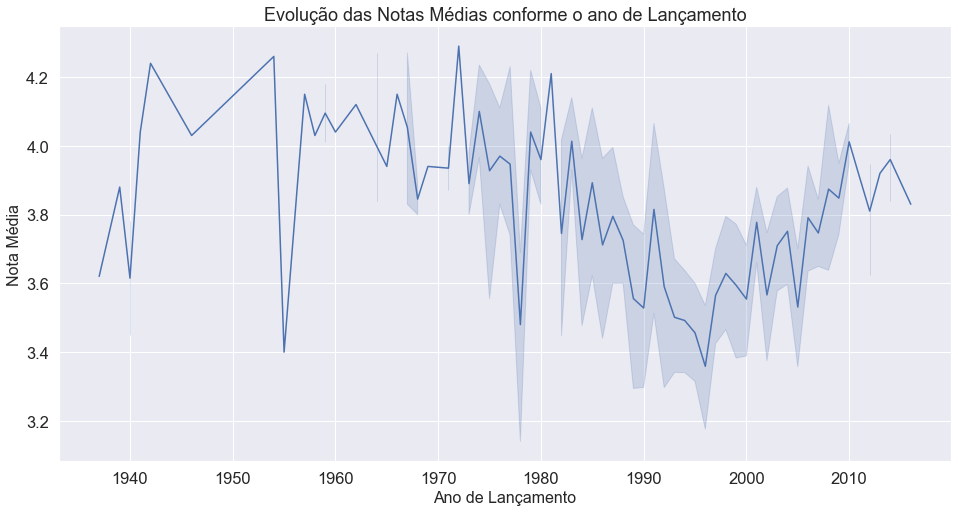

In [57]:
ax = sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data = filmes)
ax.figure.set_size_inches(16, 8)
ax.set_title('Evolução das Notas Médias conforme o ano de Lançamento', fontsize = 18)
ax.set_ylabel('Nota Média', fontsize = 16)
ax.set_xlabel('Ano de Lançamento', fontsize = 16)

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [58]:
# solução (código)
filmes_correlacao = filmes[['ano_de_lancamento', 'nota_media']]
filmes_correlacao.corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159258
nota_media,-0.159258,1.000000


### Solução (explicação)



## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

Text(0.5, 1.08, 'Relacionamento das Variáveis Ano, Nota e Votos')

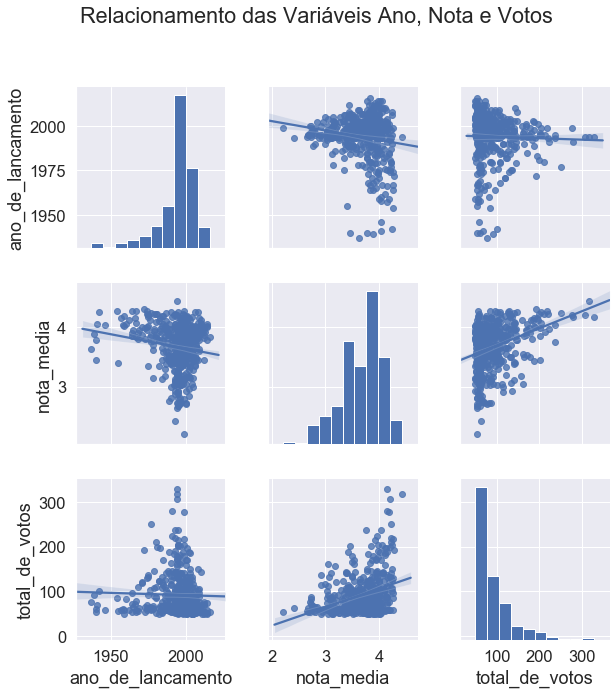

In [59]:
# solução
infos = filmes[['ano_de_lancamento', 'nota_media', 'total_de_votos']]
ax = sns.pairplot(infos, kind='reg', height=3)
ax.fig.suptitle("Relacionamento das Variáveis Ano, Nota e Votos", y=1.08)

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

Text(0.5, 1.08, 'Relacionamento das Variáveis Ano, Nota e Votos')

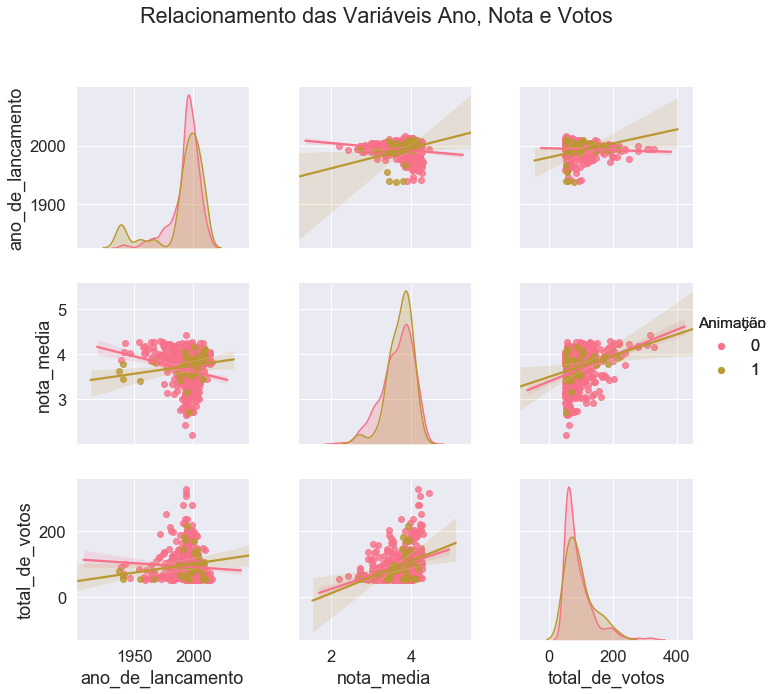

In [60]:
sns.set_palette("husl")

ax = sns.pairplot(filmes, kind='reg', height=3, hue = 'Animation',y_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'], x_vars = ['ano_de_lancamento', 'nota_media', 'total_de_votos'])

ax.add_legend(title = "Animação")
ax.fig.suptitle("Relacionamento das Variáveis Ano, Nota e Votos", y=1.08)

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:


<p> 1) Correlação Animation entre ano_de_lancamento x nota_media - O comportamento apresentado pelo gráfico indica uma correlação positiva, ou seja, quanto mais recente o filmes, mais alta a nota média. No entanto, ao analisar o desenho da reta sobre os pontos, percebe-se que grande parte esta distante da reta (provavelmente o modelo possui um R2 muito baixo). Logo, relizar um regressão linear não é a melhor forma de tentar explixar o comportamento. <p/> 
<p> 2) Correlação Animation entre ano_de_lancamento x total_de_votos - O comportamento apresentado pelo gráfico indica uma correlação positiva, ou seja, quanto mais recente os filmes, mais alto o numero de votos. No entanto, ao analisar o desenho da reta sobre os pontos, percebe-se que grande parte esta distante da reta (provavelmente o modelo possui um R2 muito baixo). Logo, relizar um regressão linear não é a melhor forma de tentar explixar o comportamento. Cabe aqui ressaltar que, se as notas médias são mais altas, os filmes em teoria são de melhor qualidade, ou seja, mais pessoas estariam dispostas a ver esses filmes.<p/> 
<p> 3) Para os demais gêneros , tanto a correlação (ano_de_lancamento x nota_media) quanto a correlação (ano_de_lancamento x total_de_votos) apresentam valores negativos. Ou seja, apresentam um comportamento contrário aos filmes de animação. No entanto, da mesma forma que no gênero de animação, a reta traçada pela regressão linear está distante de muitos pontos. Ou seja, esse não parece o melhor modelo para descrever o comportamento da correlação.<p/>
<p> 4) 1° ponto a ser ressaltado é que a correlação nota_media x total_de_votos é positiva, indepente do gênero. Portanto, a hipótese de que filmes bem avalisados em teoria levam mais pessoas para o cinema parece fazer de fato sentido. 

<p> 2° A hipótese para explicar o comportamento dos filmes de animação é de que como  esse gênero possui uma forte dependência com a tecnologia, já que suas imagens são geradas pelo computador. E como a tecnologia evolui com o tempo, os filmes mais recentes melhoram sua qualidade. Por isso, filmes após o século XX possuem melhores avaliações do que filmes antigos.  <p/>


<p> 3° A hipótese para explicar o comportamento dos filmes em geral, por incrivel que pareça, também está relacionado a tecnologia. O custo para se fazer um filme antigamento era muito maior do que o hoje, já que só o preço de uma câmera e outras tecnologias básicas para a realização de um filme era muito mais elevados. Até por isso, quando olhamos os histograma da data de lançamento dos filmes, percebemos que ocorreu um aumento considerável num tempo recente. Logo, o roteiro dos filmes mais antigos em tese tinham que passar por uma  avaliação mais criteriosa para saber se de fato seriam bem aderidos pelo público. Já na atualiadade, como o custo de produção reduziu, a régua de exigência com roteiros também diminuiu, abrindo espaço para diversos filmes menos aclamados pela crítica.<p/>


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

## Visualização I

<p> É comum que os estúdios de cinema realizem trilogias com intuito de aumentar o faturamento de seus filmes. No entanto, como será que o comportamento do número de pessoas que assitem a sequência? Aumenta ou diminui conforme os anos? E a média das notas? <p/>
<p> Para tentar respoder essas perguntas, selecionamos 3 trilogias dentro do Datraframe: Toy Story; Senhor dos Anéis; Piratas do Caribe.<p/> 
<p> A ideia aqui tentar entender se existe algum padrão, até mesmo para que uma produtora de cinema tome a decisão em dar sequência em uma triilogia ou começe um outro filme.<p/> 

In [61]:
# Filmes com Trilogia
trilogia_toy_story = ['Toy Story (1995)', 'Toy Story 2 (1999)', 'Toy Story 3 (2010)']
trilogia_pirates_of_the_caribbean = ['Pirates of the Caribbean: The Curse of the Black Pearl (2003)', "Pirates of the Caribbean: Dead Man's Chest (2006)", "Pirates of the Caribbean: At World's End (2007)"]
trilogia_lord_of_the_rings = ['Lord of the Rings: The Fellowship of the Ring, The (2001)', 'Lord of the Rings: The Two Towers, The (2002)', 'Lord of the Rings: The Return of the King, The (2003)']

In [62]:
# Selecionando Filmes no DataFrame
selecao = (filmes['titulo'].isin(trilogia_toy_story)) | (filmes['titulo'].isin(trilogia_pirates_of_the_caribbean))| (filmes['titulo'].isin(trilogia_lord_of_the_rings))
filmes_trilogia = filmes[selecao]
# Conferindo n° filmes 
selecao.sum()

9

In [63]:
# Salvando arquivo
filmes_trilogia.to_csv('filmes_trilogia.csv', index = False)

In [64]:
# Abrindo arquivo
filmes_trilogia = pd.read_csv('filmes_trilogia.csv')
filmes_trilogia.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,Toy Story (1995),1995.0,3.92,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Toy Story 2 (1999),1999.0,3.86,97.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,"Lord of the Rings: The Fellowship of the Ring,...",2001.0,4.11,198.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lord of the Rings: The Two Towers, The (2002)",2002.0,4.02,188.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pirates of the Caribbean: The Curse of the Bla...,2003.0,3.78,149.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# Criando colunas para cada trilogia
filmes_trilogia.loc[filmes_trilogia['titulo'].isin(trilogia_toy_story), 'Trilogia'] = 'Toy Story'  
filmes_trilogia.loc[filmes_trilogia['titulo'].isin(trilogia_pirates_of_the_caribbean), 'Trilogia'] = 'Pirates of the Caribbean'  
filmes_trilogia.loc[filmes_trilogia['titulo'].isin(trilogia_lord_of_the_rings), 'Trilogia'] = 'Lord of the Rings'  
filmes_trilogia.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,Trilogia
0,Toy Story (1995),1995.0,3.92,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Toy Story
1,Toy Story 2 (1999),1999.0,3.86,97.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,Toy Story
2,"Lord of the Rings: The Fellowship of the Ring,...",2001.0,4.11,198.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lord of the Rings
3,"Lord of the Rings: The Two Towers, The (2002)",2002.0,4.02,188.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Lord of the Rings
4,Pirates of the Caribbean: The Curse of the Bla...,2003.0,3.78,149.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Pirates of the Caribbean


Text(0.5, 0, 'Ano de Lançamento')

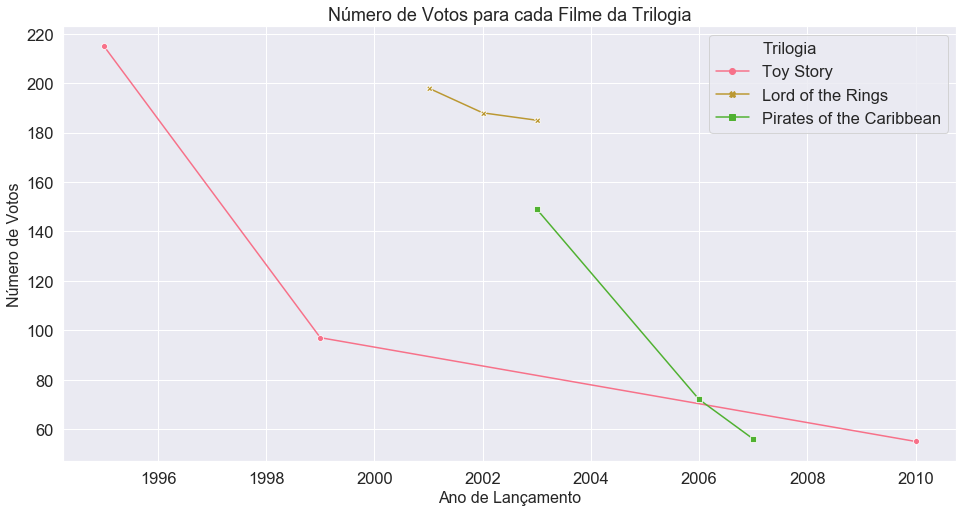

In [66]:
# Gráfico com o Número de Votos das Trilogias
ax = sns.lineplot(x = 'ano_de_lancamento', y = 'total_de_votos', data = filmes_trilogia, hue = 'Trilogia', style = 'Trilogia', markers=True, dashes=False)

ax.figure.set_size_inches(16, 8)
ax.set_title('Número de Votos para cada Filme da Trilogia', fontsize = 18)
ax.set_ylabel('Número de Votos', fontsize = 16)
ax.set_xlabel('Ano de Lançamento', fontsize = 16)

Text(0.5, 0, 'Ano de Lançamento')

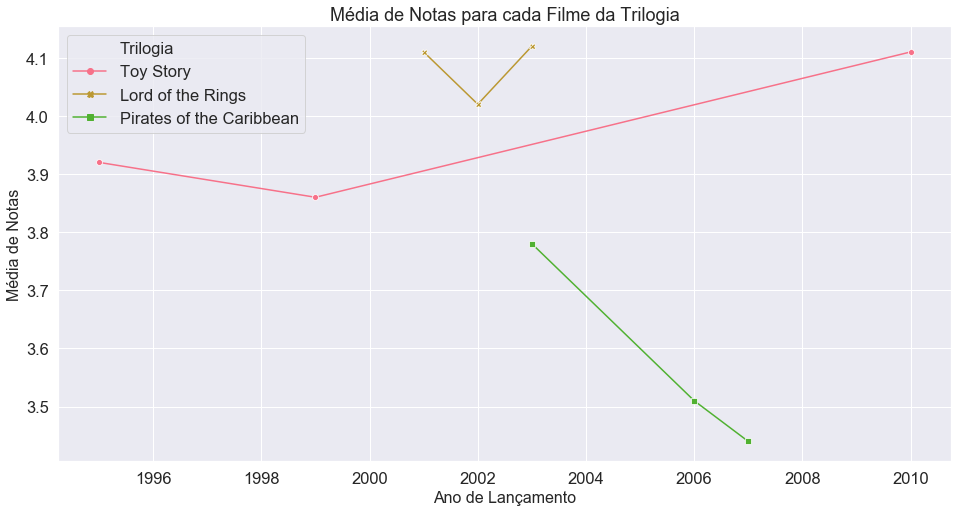

In [67]:
# Gráfico com a Média de Notas das Trilogias
ax = sns.lineplot(x = 'ano_de_lancamento', y = 'nota_media', data = filmes_trilogia, hue = 'Trilogia', style = 'Trilogia', markers=True, dashes=False)
ax.figure.set_size_inches(16, 8)
ax.set_title('Média de Notas para cada Filme da Trilogia', fontsize = 18)
ax.set_ylabel('Média de Notas', fontsize = 16)
ax.set_xlabel('Ano de Lançamento', fontsize = 16)

# Conclusão I

### Número de Votos
<p> Quando observamos o número de Votos por Filme, percebemos uma provável correlação negativa entre visualizações e a sequência dos filmes. Contudo, há de notar que esse decrescimo pode ser mais assentuado (Toy Story e Piratas do Caribe), ou suave (Senhor dos Anéis). Acredito que a diferença desses padrões se deve por 2 fatores: 1) o período entre os lançamentos dos filmes 2) O roteiro dos filmes.<p/>
<p> Como é possível observar no gráfico, o lançamento dos filmes do Senhor dos Anéis foi bem próxima. Com isso, provalvelmente os fãs da franquia  tiveram seus ânimos constantes, sem necessitar esperar uma grande quantidade de tempo para assistir a sequência, o que pode fidelizar mais os clientes. Em contrapartida, filmes com grande intervalo de tempo entre lançamentos podem cair no esqueçimento ou até mesmo perder a grande quantidade de fãs que teve com a sua estreia para algum outro gênero.<p/>
<p> Outro ponto relevante seria de que os filmes de Senhor dos Anéis já todo o roteiro dos 3 filmes concluído antes do 1° filme ser lançado. Diferentemente disso, Piratas do Caribe e ToyStory tiveram seus roteiros traçados em resposta a popularidade dos filmes anteriores. Em outras palavras, após o 1° filme ser lançado e ficar popular, o roteiro do 2° e 3° filme foram feitos. Nesse caso, acredito que a qualidade da história tende ficar prejudicada, visto que é a origem da sua criação foi em reposta a popularidade o 1°.<p/>
    <p> Dessa forma, acredito que se produtora de cinema tivesse que escolher entre fazer uma trilogia ou não, deveria antes se planejar sobre os anos de lançamento e possuir a história dos 3 filmes de antemão. Cabe aqui ressaltar essa foi apenas uma analise exploratória, com um conjunto pequeno de 9 filmes. Além disso, o número de votos é bem pequeno (máximo de 200 por filme) em coparação ao universo de pessoas que foram as salas de cinema. Logo, acredito que uma analise com outro banco de dados deve ser realizada antes de ter certeza de tal conclusão.

### Média de Notas
<p> Ao observar a média de notas, não conseguimos identificar um padrão como anteriormente. Enquanto Senhor dos Anéis e Toy Story possuem o 3° filme como o mais bem avaliado, Piratas do Caribe tem a pior nota com o último filme. Acredito que mais filmes devem ser analisados, pois talvez exista alguma tendência do filme n°2 ser o pior avaliado. Contudo essa é somente uma hipótese observando o comportamento de Toy Story e Senhor dos Anéis.   <p/>

## Visualização 2

<p> Durante a analise exploratória, vimos tanto o comportamento do número de votos quanto a média de notas por gênero. No entanto, qual é a correlação desses atributos? Qual é o gênero que possui maior correlação entre esses dois? É de se esperar que quanto maior a nota média, maior o número de votos.<p/>


In [68]:
# Número de Filmes
filmes_por_genero = pd.array(generos.sum())

In [69]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.92,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.43,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.26,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.95,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.19,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [70]:
# Gêneros
array_generos = np.array(generos.columns)
array_generos

array(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'FilmNoir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War',
       'Western'], dtype=object)

In [71]:
lista_correlacao_genero = []
for genero in array_generos:
    selecao = filmes[genero] == 1
    filmes_1 =filmes[selecao]
    filmes_1.corr()

In [72]:
# Gerando correlação entre número de votos e média de notas para cada Gênero
lista_correlacao_genero = []
for genero in array_generos:
    selecao = filmes[genero] == 1
    filmes_1 =filmes[selecao]
    filmes_1.corr()
    lista_correlacao_genero.append(filmes_1.corr().iloc[1,2])
print (lista_correlacao_genero)

[0.3531233193011374, 0.33705311178215747, 0.3413469459953471, 0.3090971164899109, 0.2852930214258337, 0.34996617950413905, 1.0, 0.44049591170105185, 0.34039989104391066, 0.04183049202329301, 0.4378362020420435, 0.21674527027768226, 0.3845989202655853, 0.32487838675287456, 0.36950031953937584, 0.44003873092109363, 0.36902495492643517, 0.42907050057182805, 0.2992036212127971]


In [73]:
# Transformando informações em dataframe
df_genero_correlacao = pd.DataFrame(array_generos, columns = ['Generos'])
df_genero_correlacao['Correlacao'] = lista_correlacao_genero
df_genero_correlacao['Nº Filmes'] = filmes_por_genero
df_genero_correlacao.sort_values(by = 'Correlacao', ascending = False)

,Generos,Correlacao,Nº Filmes
6,Documentary,1.000000,2
7,Drama,0.440496,166
15,SciFi,0.440039,92
10,Horror,0.437836,26
17,War,0.429071,19
12,Musical,0.384599,21
14,Romance,0.369500,85
16,Thriller,0.369025,121
0,Action,0.353123,164
5,Crime,0.349966,87


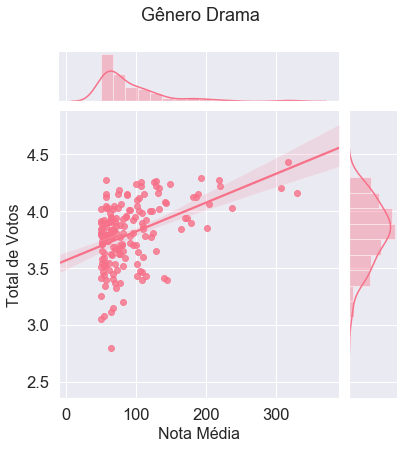

In [74]:
# Como N° Filmes Documentario = 2, vamos analisar a correlação do Gênero Drama
filmes_drama =filmes[filmes['Drama'] == 1]

ax = sns.jointplot(x = filmes_drama['total_de_votos'], y = filmes_drama['nota_media'], data = filmes_drama, kind = 'reg')
ax.fig.suptitle("Gênero Drama", y=1.06 , fontsize= 18)
ax.set_axis_labels("Nota Média", "Total de Votos", fontsize =16)

# Conclusão 2



<p> É possível verificar uma correlação positiva entre Total de Votos e Nota Média, o que era esperado. No entanto, embora tenhamos filtrado o gênero com maior correlação, é possível identificar viusalmente no gráfico de dispersão que grande parte dos dados estão longe da regressão linear sugerida. Ou seja, caso fosse realizado um modelo, o R2 seria muito pequeno, resutando numa baixa precisão do nosso modelo preditivo. Logo, para criação de um modelo que pudesse prever qual a nota média de um filme, seria necessário a inserção de outras variáveis no modelo para aumentar a acuracidade da regressão.<p/>
